In [1]:
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from pandas import DataFrame, read_csv
import pandas as pd
import arrow
import seaborn as sns
%matplotlib inline

In [2]:
train = read_csv('data/train.csv')
train['hour'] = train.datetime.apply(lambda dt: arrow.get(dt).hour)
train['day'] = train.datetime.apply(lambda dt: arrow.get(dt).day)
print(train.head(30))
print(train.dtypes)

               datetime  season  holiday  workingday  weather   temp   atemp  \
0   2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1   2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2   2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3   2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4   2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5   2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6   2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7   2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8   2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9   2011-01-01 09:00:00       1        0           0        1  13.12  17.425   
10  2011-01-01 10:00:00       1        0           0        1  15.58  19.695   
11  2011-01-01 11:00:00       1        0

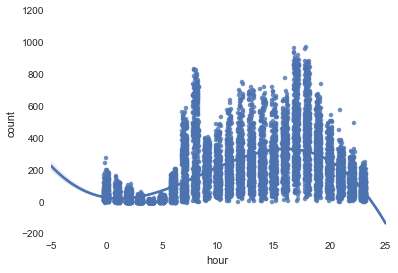

In [3]:
sns.regplot(x="hour", y="count", data=train, x_jitter=0.25, order=3)

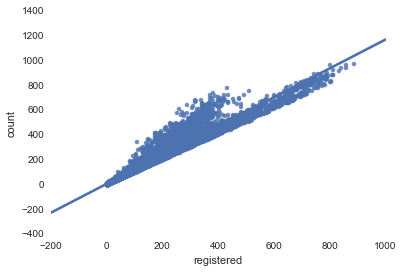

In [4]:
sns.regplot(x="registered", y="count", data=train)

In [19]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

xtrain0 = train[['season', 'hour', 'holiday', 'workingday', 'humidity', 'windspeed', 'weather', 'temp']]
ytrain = train['count']
mapper = DataFrameMapper([('season', LabelBinarizer()),
                          ('hour', LabelBinarizer()),
                          ('holiday', LabelBinarizer()),
                          ('workingday', LabelBinarizer()),
                          ('humidity', StandardScaler()),
                          ('windspeed', StandardScaler()),
                          ('weather', LabelBinarizer()),
                          ('temp', StandardScaler())])
xtrain1 = mapper.fit_transform(xtrain)
model = LinearRegression()
model.fit(xtrain1, ytrain)
print(model)
print(model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  1.13629937e+13   1.13629937e+13   1.13629937e+13   1.13629937e+13
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
  -6.95367968e+00   1.07551588e+00  -1.83050617e+01  -6.31882583e+00
   1.03520437e+15   1.03520437e+15   1.03520437e+15   1.03520437e+15
   5.15285956e+01]


In [20]:
model.score(xtrain1, ytrain)

0.63201308408139922